In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [59]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
ids = test['PassengerId']
df = pd.concat([train, test])
df = df.drop(columns = ['PassengerId'])

In [60]:
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
# df['Cabin'] = df['Cabin'].fillna(df['Cabin'].mode()[0])
df = df.drop(columns = ['Cabin', 'Name', 'Ticket'])

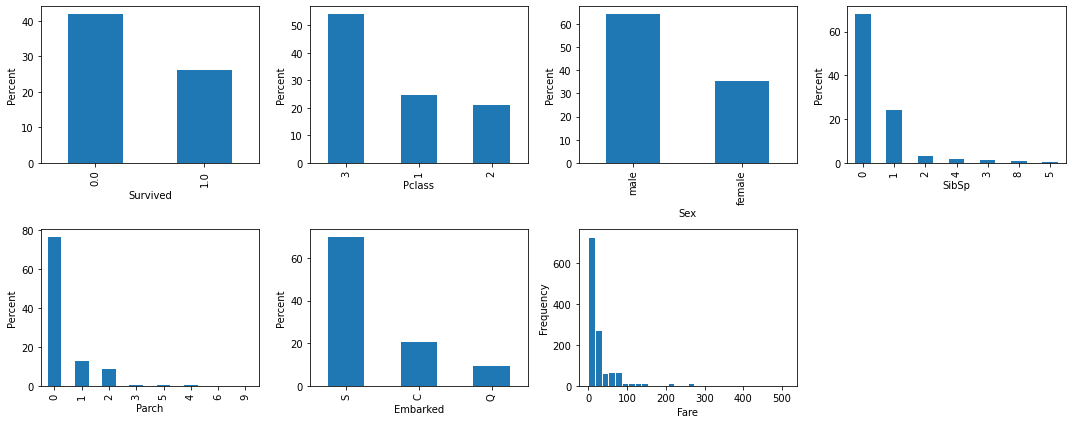

In [65]:
categorical = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
numerical = ['Fare']

fig, axes = plt.subplots(2, 4, figsize=(15, 6))
axes = axes.flatten()

for i, col in enumerate(categorical):
    (100* df[col].value_counts() / len(df)).plot.bar(ax = axes[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Percent')

for i, col in enumerate(numerical):
    j = i+len(categorical)
    
    df[col].plot.hist(ax = axes[j], bins = 30, edgecolor='white')
    axes[j].set_xlabel(col)
    
for ax in axes[j+1:]:
    ax.axis('off')
    
plt.tight_layout()

In [66]:
df_dummy = pd.get_dummies(df)

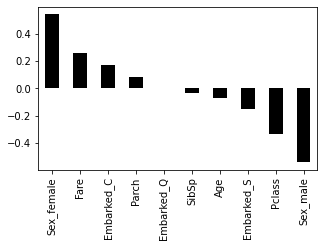

In [68]:
df_dummy.corr()['Survived'].sort_values(ascending=False)[1:].plot.bar(figsize=(5,3), cmap='copper')
plt.show()

In [69]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

X = df_dummy.drop(columns='Survived')
y = df_dummy['Survived']

features = X.columns.values

Scaler = MinMaxScaler()
Scaler.fit(X)
X = Scaler.transform(X)

X = pd.DataFrame(X, columns = features)

X_test = X[len(train):]
X = X.iloc[:len(train)]
y = y.iloc[:len(train)]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3)

In [70]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_train_pred = model_lr.predict(X_train)
y_valid_pred = model_lr.predict(X_valid)

print("Training score: ", metrics.f1_score(y_train, y_train_pred))
print("Validation score: ", metrics.f1_score(y_valid, y_valid_pred))

Training score:  0.7246376811594203
Validation score:  0.7422680412371134


In [73]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_valid_pred = model.predict(X_valid)

print("Training score: ", metrics.f1_score(y_train, y_train_pred))
print("Validation score: ", metrics.f1_score(y_valid, y_valid_pred))

Training score:  0.9593495934959351
Validation score:  0.774869109947644


In [74]:
final_model = XGBClassifier()
model.fit(X, y)
print("Training score: ", metrics.f1_score(y, model.predict(X)))
y_test_pred = model.predict(X_test)

Training score:  0.9506726457399103


In [76]:
output = pd.DataFrame({'PassengerId': ids, 'Survived': y_test_pred})

In [78]:
output.to_csv("Submission6.csv", index=False)